In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_info = pd.read_csv('DATA/lending_club_info.csv', index_col = 'LoanStatNew')

In [3]:
data_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, loan_amnt to pub_rec_bankruptcies
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  28 non-null     object
dtypes: object(1)
memory usage: 448.0+ bytes


In [4]:
def get_info(col):
    return data_info.loc[col][0]

In [5]:
get_info('term')

'The number of payments on the loan. Values are in months and can be either 36 or 60.'

In [6]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [8]:
get_info('mort_acc')

'Number of mortgage accounts.'

In [9]:
df['Fully Paid'] = pd.get_dummies(df['loan_status'])['Fully Paid']

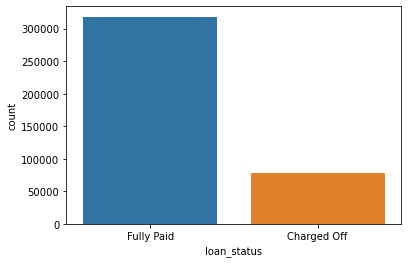

In [10]:
sns.countplot(df['loan_status'])

In [11]:
get_info('installment')

'The monthly payment owed by the borrower if the loan originates.'

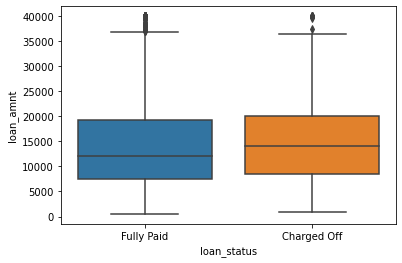

In [12]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [14]:
df.groupby('grade')['Fully Paid'].mean().sort_values()

grade
G    0.521611
F    0.572120
E    0.626366
D    0.711322
C    0.788191
B    0.874270
A    0.937121
Name: Fully Paid, dtype: float64

In [15]:
get_info('dti')

'A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.'

In [16]:
df['36 months'] = pd.get_dummies(df['term'], drop_first=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [18]:
df['paid'] = df['Fully Paid']
df.drop('Fully Paid', axis = 1, inplace = True)

In [19]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [20]:
df['initial_list_status'].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [21]:
df['year'] = df['issue_d'].apply(lambda month: int(month.split('-')[1]))

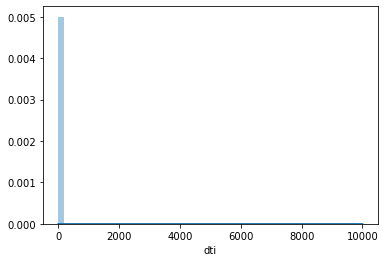

In [22]:
sns.distplot(df['dti'])

In [23]:
df.groupby('issue_d')['paid'].mean().sort_values()

issue_d
Mar-2015    0.731976
Jun-2015    0.732174
May-2015    0.735616
Apr-2015    0.736536
Feb-2015    0.744803
              ...   
Oct-2016    0.997655
Nov-2016    1.000000
Jul-2007    1.000000
Dec-2016    1.000000
Jun-2007    1.000000
Name: paid, Length: 115, dtype: float64

In [31]:
df = pd.concat([df, pd.get_dummies(df['grade'], drop_first=True)], axis = 1)

In [ ]:
#sns.boxplot(x='annual_inc',y='loan_amnt',data=df)

In [25]:
df.drop(['pub_rec', 'application_type', 'address', 'initial_list_status', 'sub_grade', 'emp_title', 'home_ownership',
        'term'], inplace = True, axis = 1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   annual_inc            396030 non-null  float64
 4   dti                   396030 non-null  float64
 5   open_acc              396030 non-null  float64
 6   revol_bal             396030 non-null  float64
 7   revol_util            395754 non-null  float64
 8   total_acc             396030 non-null  float64
 9   mort_acc              358235 non-null  float64
 10  pub_rec_bankruptcies  395495 non-null  float64
 11  36 months             396030 non-null  uint8  
 12  paid                  396030 non-null  uint8  
 13  year                  396030 non-null  int64  
 14  B                     396030 non-null  uint8  
 15  

In [32]:
df = pd.concat([df, pd.get_dummies(df['emp_length'], drop_first=True)], axis = 1)

In [34]:
df.drop(['verification_status', 'issue_d', 'loan_status', 'title', 'grade', 'emp_length', 'purpose', 'earliest_cr_line'], axis = 1, inplace = True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   loan_amnt    396030 non-null  float64
 1   int_rate     396030 non-null  float64
 2   installment  396030 non-null  float64
 3   annual_inc   396030 non-null  float64
 4   dti          396030 non-null  float64
 5   open_acc     396030 non-null  float64
 6   revol_bal    396030 non-null  float64
 7   revol_util   395754 non-null  float64
 8   total_acc    396030 non-null  float64
 9   36 months    396030 non-null  uint8  
 10  paid         396030 non-null  uint8  
 11  year         396030 non-null  int64  
 12  B            396030 non-null  uint8  
 13  C            396030 non-null  uint8  
 14  D            396030 non-null  uint8  
 15  E            396030 non-null  uint8  
 16  F            396030 non-null  uint8  
 17  G            396030 non-null  uint8  
 18  10+ years    396030 non-

In [62]:
df.drop('revol_util', axis = 1, inplace = True)

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
X = df.drop('paid', axis = 1).values
y = df['paid'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [66]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
X_train.shape

(277221, 26)

In [69]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [71]:
model = Sequential()

model.add(Dense(26, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(13, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [72]:
model.fit(x=X_train, y=y_train, epochs = 700, batch_size = 128, validation_data=(X_test, y_test), verbose = 1, callbacks = [early_stop])

Epoch 1/700
2166/2166 [==============================] - 4s 2ms/step - loss: 0.4939 - val_loss: 0.4604
Epoch 2/700
2166/2166 [==============================] - 3s 2ms/step - loss: 0.4679 - val_loss: 0.4594
Epoch 3/700
2166/2166 [==============================] - 3s 2ms/step - loss: 0.4647 - val_loss: 0.4578
Epoch 4/700
2166/2166 [==============================] - 4s 2ms/step - loss: 0.4627 - val_loss: 0.4572
Epoch 5/700
2166/2166 [==============================] - 4s 2ms/step - loss: 0.4620 - val_loss: 0.4568
Epoch 6/700
2166/2166 [==============================] - 3s 2ms/step - loss: 0.4611 - val_loss: 0.4563
Epoch 7/700
2166/2166 [==============================] - 4s 2ms/step - loss: 0.4610 - val_loss: 0.4557
Epoch 8/700
2166/2166 [==============================] - 3s 2ms/step - loss: 0.4607 - val_loss: 0.4562
Epoch 9/700
2166/2166 [==============================] - 4s 2ms/step - loss: 0.4604 - val_loss: 0.4560
Epoch 10/700
2166/2166 [==============================] - 3s 2ms/step - l

Epoch 80/700
2166/2166 [==============================] - 3s 2ms/step - loss: 0.4560 - val_loss: 0.4506
Epoch 81/700
2166/2166 [==============================] - 3s 2ms/step - loss: 0.4557 - val_loss: 0.4498
Epoch 82/700
2166/2166 [==============================] - 3s 2ms/step - loss: 0.4557 - val_loss: 0.4501
Epoch 83/700
2166/2166 [==============================] - 3s 2ms/step - loss: 0.4554 - val_loss: 0.4503
Epoch 84/700
2166/2166 [==============================] - 3s 2ms/step - loss: 0.4555 - val_loss: 0.4495
Epoch 85/700
2166/2166 [==============================] - 3s 2ms/step - loss: 0.4557 - val_loss: 0.4502
Epoch 86/700
2166/2166 [==============================] - 3s 2ms/step - loss: 0.4555 - val_loss: 0.4506
Epoch 87/700
2166/2166 [==============================] - 3s 2ms/step - loss: 0.4561 - val_loss: 0.4505
Epoch 88/700
2166/2166 [==============================] - 4s 2ms/step - loss: 0.4562 - val_loss: 0.4509
Epoch 89/700
2166/2166 [==============================] - 4s 2ms

KeyboardInterrupt: 

In [73]:
pred = model.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
print(confusion_matrix(pred, y_test))

ValueError: Classification metrics can't handle a mix of continuous and binary targets